<h1>Exploring the Josephus Problem (in unnecessary detail)</h1>

I was curious about the Josephus Problem, so this is a notebook I made, experimenting with various "levels" of the Josephus problem - starting from very simple to getting more and more complicated.

In [3]:
using Plots
using DataFrames

include("JosephusFunctions.jl")     # Local module

using .JosephusFunctions

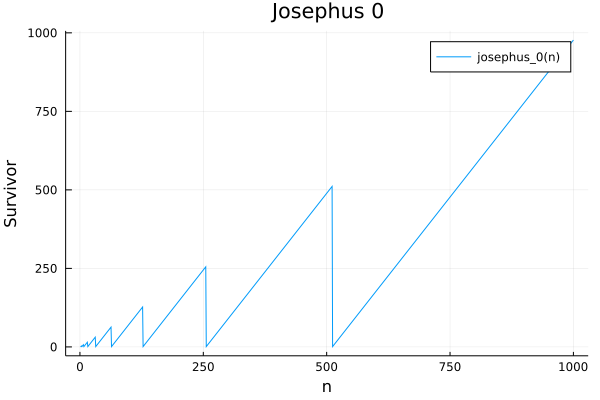

In [9]:
n = 1:1000
survivor = JosephusFunctions.josephus_0.(n)

plot(n, survivor, label="josephus_0(n)")
title!("Josephus 0")
xlabel!("n")
ylabel!("Survivor")

This was pretty interesting to see. It appears that there were spikes increasing in height, and when they reached the peak, they dropped straight down to 0. To investigate this further, I made a dataframe from 1 to 20, to see what was going on in greater detail, and when these spikes were happening.

In [10]:
DataFrame(n=n[1:20], survivor=survivor[1:20])

,n,survivor
,Int64,Int64
1,1,1
2,2,1
3,3,3
4,4,1
5,5,3
6,6,5
7,7,7
8,8,1
9,9,3


From the table, it can be observed that when <em>n</em> is a power of 2, the survivor is always 1, and otherwise the survivor is always increasing until it reaches the next power of 2, where it drops back to 1 again.

Next, I used josephus_0, which took in 2 parameters: *n* and *k*. *n* is the number of people in the circle (as it was previously), while *k* is the people killed next. For example, in josephus_0, *k* would have been 2. Again, I plotted this for *k* = 3 to see if there was a pattern. I predicted that if it was a power of 3, then the survivor would be 1, and otherwise there would be an increase of 3 - similar to what happened with josephus_0

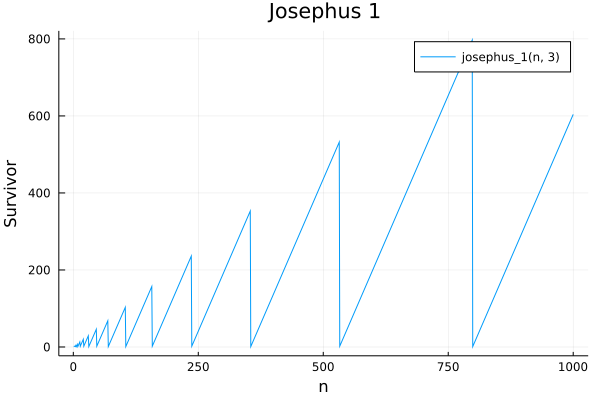

In [18]:
n = 1:1000
survivor = JosephusFunctions.josephus_1.(n, 3)

plot(n, survivor, label="josephus_1(n, 3)")
title!("Josephus 1")
xlabel!("n")
ylabel!("Survivor")

I was surprised at that result. On one hand, the results can be considered similar, with the rising linear spikes and the sudden drops to 1, however, the spikes arent happening at powers of 3, like I expected. Again, I made a dataframe to explore what was happening in more detail.

In [19]:
DataFrame(n=n[1:20], survivor=survivor[1:20])

,n,survivor
,Int64,Int64
1,1,1
2,2,2
3,3,2
4,4,1
5,5,4
6,6,1
7,7,4
8,8,7
9,9,1


It seemed more random, that although the next survivor was increasing by 3 each time, it would no longer drop to 1 each time. At *n* = 14, the pattern suddenly dropped to 2. However, this does actually make sense - 13 + 3 = 17 = 2 (mod 14). From this, we can change what we thought about what happened in josephus_0 (where *k*=2) The reason why the peaks were at powers of 2, was because the survivor was increasing by 2 as *n* increased by 2, and eventually, the survivor would surpass *n*, when *n* was at powers of 2, hence why *n* dropped back to 1.

Next, I wanted to see what would happen if there were multiple lives as well - that when the person killed the next person, they also had another live(s) remaining, and would only die once they go to 0 lives.